In [ ]:
import pandas as pd

In [42]:
# 读取Excel文件
df = pd.read_excel('./final_exam_dataset.xlsx')

# 显示DataFrame的内容
df

,Unnamed: 0,実質消費,実質GDP,預金金利
0,1994-03-01,247506.1,446276.5,2.036667
1,1994-06-01,248845.9,443822.8,1.992333
2,1994-09-01,250605.7,448928.5,2.049000
3,1994-12-01,250737.5,447124.9,2.166667
4,1995-03-01,252915.2,452096.3,2.089333
...,...,...,...,...
111,2021-12-01,292739.9,544376.8,0.052333
112,2022-03-01,290007.1,541843.6,0.048333
113,2022-06-01,294688.4,548075.3,0.051667
114,2022-09-01,294756.1,546607.5,0.061000


In [ ]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  116 non-null    datetime64[ns]
 1   実質消費        116 non-null    float64       
 2   実質GDP       116 non-null    float64       
 3   預金金利        116 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.8 KB


In [53]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

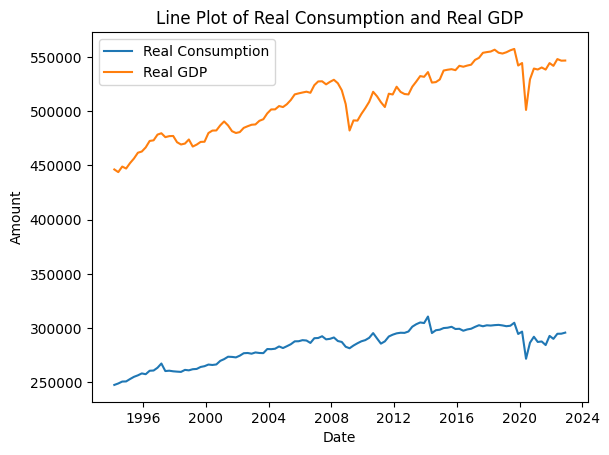

In [54]:
# 提取实际消费和实际GDP的数据列
consumption = df['実質消費']
gdp = df['実質GDP']

# 创建折线图
plt.plot(df['Unnamed: 0'], consumption, label='Real Consumption')
plt.plot(df['Unnamed: 0'], gdp, label='Real GDP')

# 添加图例、标题和坐标轴标签
plt.legend()
plt.title('Line Plot of Real Consumption and Real GDP')
plt.xlabel('Date')
plt.ylabel('Amount')

# 显示图表
plt.show()

折线图中的横轴表示日期，纵轴表示金额。图中会有两条线，一条表示实际消费，另一条表示实际GDP。通过观察这两条线的变化趋势，可以比较实际消费和实际GDP之间的关系。

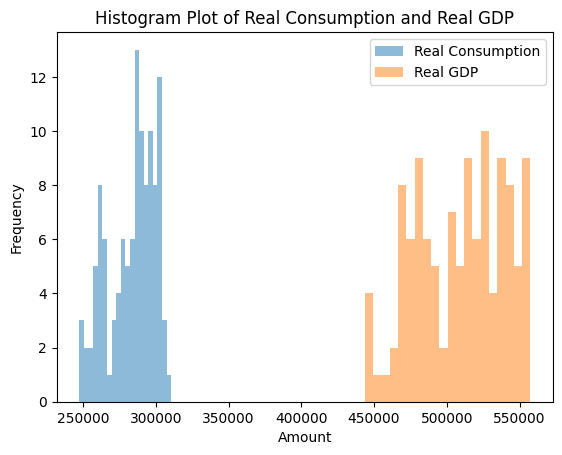

In [55]:
# 提取实际消费和实际GDP的数据列
consumption = df['実質消費']
gdp = df['実質GDP']

# 创建分布图
plt.hist(consumption, bins=20, alpha=0.5, label='Real Consumption')
plt.hist(gdp, bins=20, alpha=0.5, label='Real GDP')

# 添加图例、标题和坐标轴标签
plt.legend()
plt.title('Histogram Plot of Real Consumption and Real GDP')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# 显示图表
plt.show()

分布图将显示实际消费和实际GDP各自的数据分布情况。图中将有两个直方图，一个表示实际消费，另一个表示实际GDP。通过观察直方图的高度和分布形状，可以了解实际消费和实际GDP的数据分布情况。

In [ ]:
import statsmodels.api as sm


In [ ]:
# 提取实际消费和实际GDP的数据列
consumption = df['実質消費']
gdp = df['実質GDP']

# 添加常数列
X = sm.add_constant(gdp)

# 创建线性回归模型
model = sm.OLS(consumption, X)

# 拟合模型
results = model.fit()

# 打印回归结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   実質消費   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     829.5
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           3.83e-54
Time:                        10:34:40   Log-Likelihood:                -1163.6
No. Observations:                 116   AIC:                             2331.
Df Residuals:                     114   BIC:                             2337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.488e+04   8643.045      4.035      0.0

将进行单变量线性回归分析，使用实际GDP作为自变量（X）和实际消费作为因变量（Y）。回归模型将添加常数列，并使用sm.OLS函数创建线性回归模型。然后，通过调用fit方法来拟合模型，并将结果存储在results变量中。

最后，使用results.summary()打印回归结果的摘要统计信息，包括回归系数、截距、拟合优度、p值等。


In [ ]:
# 提取实际消费、实际GDP和存款利率的数据列
consumption = df['実質消費']
gdp = df['実質GDP']
interest_rate = df['預金金利']

# 创建自变量矩阵
X = sm.add_constant(pd.concat([gdp, interest_rate], axis=1))

# 创建线性回归模型
model = sm.OLS(consumption, X)

# 拟合模型
results = model.fit()

# 打印回归结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   実質消費   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     440.5
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.45e-54
Time:                        10:34:43   Log-Likelihood:                -1160.1
No. Observations:                 116   AIC:                             2326.
Df Residuals:                     113   BIC:                             2334.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.294e+04   1.08e+04      4.896      0.0

使用实际GDP和存款利率作为自变量（X），实际消费作为因变量（Y）。自变量矩阵X将添加常数列，并使用sm.OLS函数创建线性回归模型。然后，通过调用fit方法来拟合模型，并将结果存储在results变量中。

最后，使用results.summary()打印回归结果的摘要统计信息，包括回归系数、截距、拟合优度、p值等。